In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.cm import get_cmap
import toblerone as tob
import nibabel as nib 

cmap = np.array(get_cmap('tab10').colors)

In [4]:
p = '/mnt/hgfs/Data/thesis_data/svb_evaluation/sim_rpts/projector_common.h5'
proj = tob.Projector.load(p)

In [5]:
vtx_per_vox = (proj.surf2vol_matrix(True) > 0).sum(1).A.flatten()
vox_per_vtx = (proj.surf2vol_matrix(True) > 0).sum(0).A.flatten()

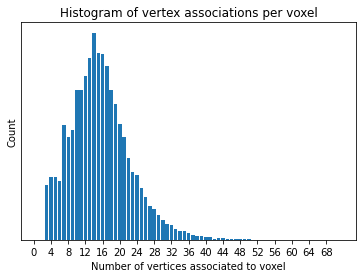

In [10]:
count, bins = np.histogram(vtx_per_vox, vtx_per_vox.max())
bc = bins[1:] - 0.5

plt.figure(figsize=(6,4))
plt.bar(bc[1:], count[1:])
plt.yticks([])
plt.xticks(bc[::4], labels=bins[:-1:4].astype(np.int32))
plt.title('Histogram of vertex associations per voxel')
plt.xlabel('Number of vertices associated to voxel')
plt.ylabel('Count')
plt.savefig('figs/vtx_per_vox.png', bbox_inches='tight', dpi=250)

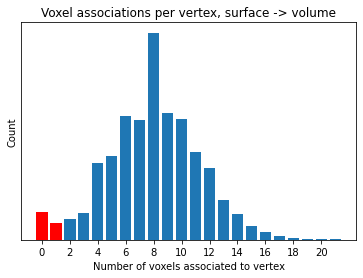

In [17]:
count, bins = np.histogram(vox_per_vtx, vox_per_vtx.max())
bc = bins[1:] - 0.5

plt.figure(figsize=(6,4))
plt.bar(bc[2:], count[2:])
plt.bar(bc[:2], count[:2], color='r')
plt.yticks([])
plt.xticks(bc[::2], labels=bins[:-1:2].astype(np.int32))
plt.title('Voxel associations per vertex, surface -> volume')
plt.xlabel('Number of voxels associated to vertex')
plt.ylabel('Count')
plt.savefig('figs/vox_per_vtx.png', bbox_inches='tight', dpi=250)
plt.show()

In [12]:
cbf_var = nib.load('var_ftiss_L_cortex.func.gii').darrays[0].data
l_vox_per_vtx = vox_per_vtx[:cbf_var.size]

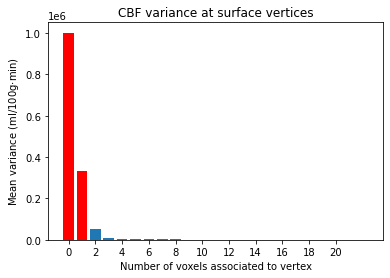

In [15]:
fig, ax = plt.subplots(1,1, figsize=(6,4))

for c in np.arange(l_vox_per_vtx.max()+1):
    y = cbf_var[l_vox_per_vtx == c].mean()

    if c < 2: 
        ax.bar(c+0.5, y, color='r')
    else:
        ax.bar(c+0.5, y, color=cmap[0,:])
    
ax.set_xticks(bc[::2])
ax.set_xticklabels(bins[:-1:2].astype(np.int32))
ax.set_title('CBF variance at surface vertices')
ax.set_xlabel('Number of voxels associated to vertex')
ax.set_ylabel(r'Mean variance (ml/100g$\cdot$min)')
plt.savefig('figs/var_at_vtx.png', bbox_inches='tight', dpi=250)
plt.show()